# For processing

In [3]:
from BeatNet.BeatNet import BeatNet
import pickle as pkl
import os

estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)


directory = os.fsencode('inputs/')

data = {}
with open("beat_data.pkl","rb") as f:
    data = pkl.load(f)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".wav") or filename.endswith(".mp3") or filename.endswith(".m4a"): 
        name = filename[:-4]
        if name not in data:
            data[name] = estimator.process("inputs/" + filename)
            print(f"Processed '{name}'.")
        else:
            print(f"Name '{name}' already exists!  Not processed.")

with open("beat_data.pkl","wb+") as f:
    pkl.dump(data, f)

Name '09 D'Angelo - Spanish Joint' already exists!  Not processed.
Name '100bpm' already exists!  Not processed.
Name 'fengs' already exists!  Not processed.
Name '06 Encore A' already exists!  Not processed.
Name 'milaklaw' already exists!  Not processed.
Name '03 All the Pretty Girls' already exists!  Not processed.
Name 'lms' already exists!  Not processed.


# For loading

In [4]:
import pickle as pkl

with open("beat_data.pkl","rb") as f:
    data = pkl.load(f)

data.keys()

dict_keys(['fengs', 'lms', '100bpm', 'milaklaw', '06 Encore A', "09 D'Angelo - Spanish Joint", '03 All the Pretty Girls'])

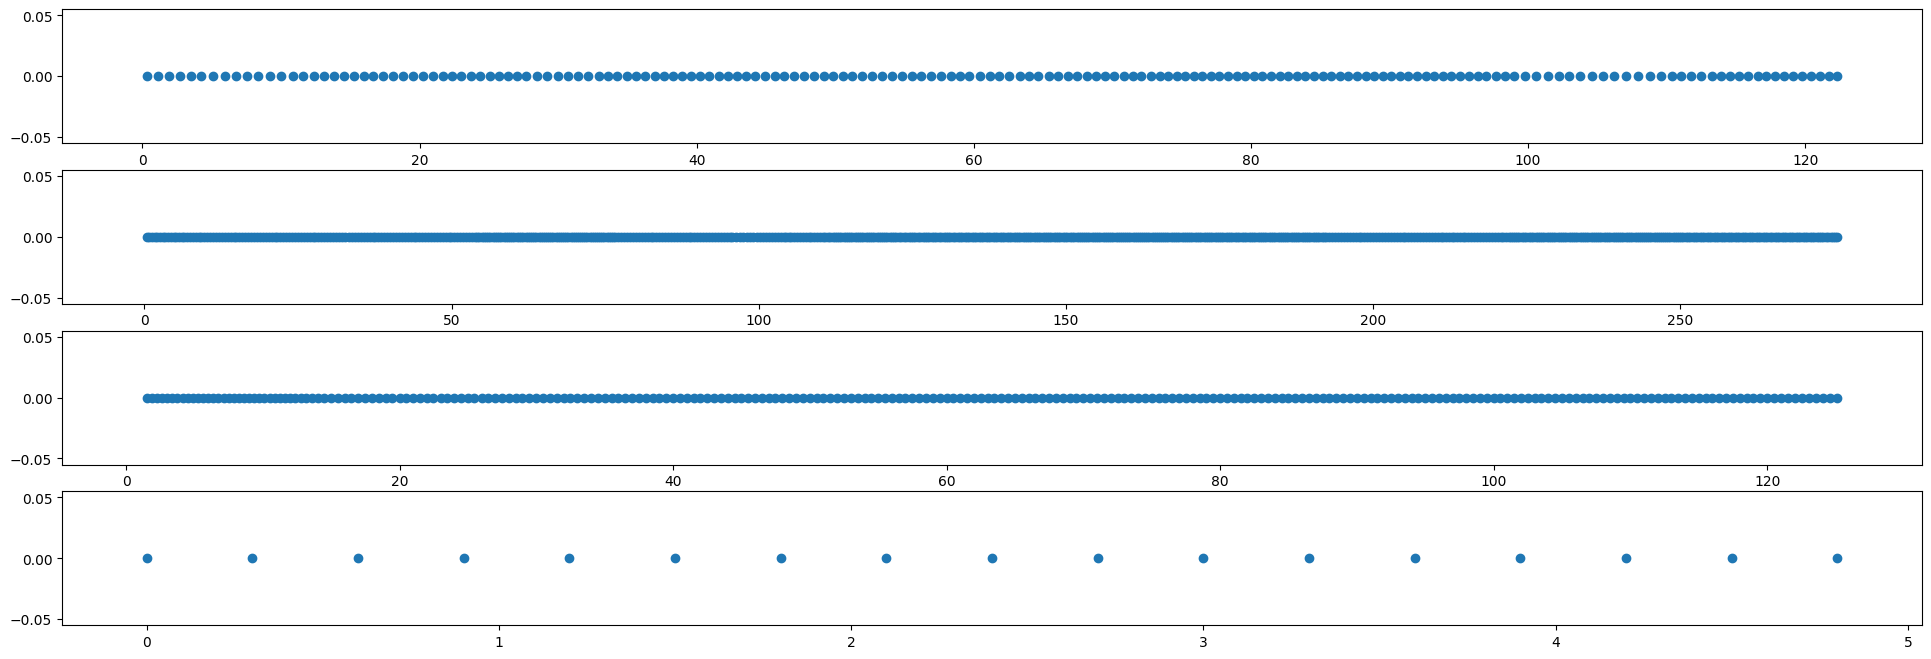

In [7]:
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(figsize=(24,8), nrows=4, ncols=1)
ax[0].scatter(data['awakening'][:,0], np.zeros(data['awakening'].shape[0]), marker='o')
ax[1].scatter(data['fengs'][:,0], np.zeros(data['fengs'].shape[0]), marker='o')
ax[2].scatter(data['lms'][:,0], np.zeros(data['lms'].shape[0]), marker='o')
ax[3].scatter(data['100bpm'][:,0], np.zeros(data['100bpm'].shape[0]), marker='o')


# For testing

In [8]:
from BeatNet.BeatNet import BeatNet

#estimator = BeatNet(1, mode='offline', inference_model='DBN', plot=[], thread=False)
#estimator.process("inputs/awakening.mp3")



# For playing

In [9]:
import pickle as pkl
import ipywidgets as widgets
from IPython.display import display

with open("beat_data.pkl","rb") as f:
    data = pkl.load(f)
# Default
file = '100bpm'


w = widgets.Dropdown(
    options=list(data.keys()),
    value='100bpm',
    description='Choose file:',
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("selected '%s'" % change['new'])
        global file
        file = change['new']

w.observe(on_change)
display(w)


Dropdown(description='Choose file:', index=2, options=('fengs', 'lms', '100bpm', 'awakening', 'milaklaw', 'sea…

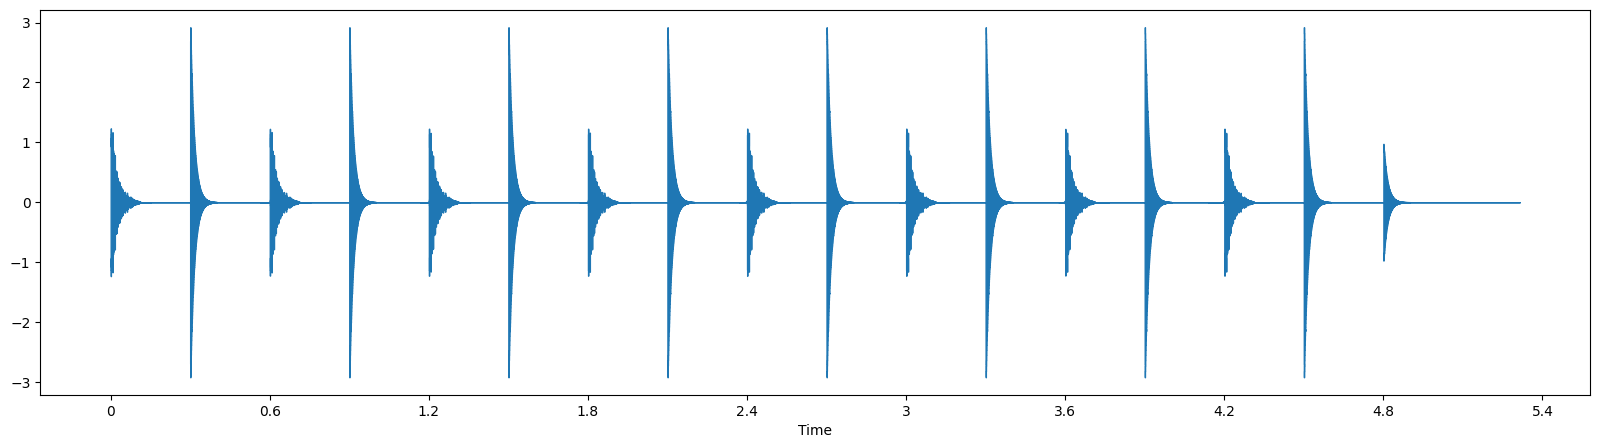

In [10]:
import numpy as np
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load(f'inputs/{file}.mp3')

# Make a basic metronome
met = librosa.clicks(times=data[file][:,0], sr=sr, length=y.shape[0])
y_met = met + y
# Triple the magnitude on downbeats
dbs = data[file][data[file][:,1] == 1,0]
db_met = librosa.clicks(times=dbs, sr=sr, length=y.shape[0])
y_met = 2 * db_met + y_met

plt.figure(figsize=(20, 5))
display(librosa.display.waveshow(y_met, sr=sr, label='Beat clicks'))

Audio(data=y_met, rate=sr)

